The following cells imports and reads the files

In [58]:
import pandas as pd
from yellowbrick.classifier import ConfusionMatrix
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC

In [59]:
from os.path import exists
data_dir = 'data'
#data_dir = 'Documents/Users/kobo/514-assignment-1/data'
assert exists(f'{data_dir}/hk.csv'), 'data file is missing.'
hkdata = pd.read_csv(f'{data_dir}/hk.csv')
mydata = pd.read_csv(f'{data_dir}/my.csv')
mwdata = pd.read_csv(f'{data_dir}/mw.csv')

In [60]:
hkdata.drop(['Unnamed: 0'], axis=1)

,class,x-box,y-box,width,high,onpix,x-bar,y-bar,x2bar,y2bar,xybar,x2ybr,xy2br,x-ege,xegvy,y-ege,yegvx
0,H,4,5,5,4,4,7,7,6,6,7,6,8,3,8,3,8
1,H,6,9,8,7,6,8,6,6,7,7,7,9,6,8,4,8
2,H,3,3,4,1,2,8,7,5,6,7,6,8,5,8,3,7
3,H,3,5,5,4,3,7,8,3,6,10,6,8,3,8,3,8
4,H,8,12,8,6,4,9,8,4,5,8,4,5,6,9,5,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1468,K,7,9,8,5,4,5,8,4,6,10,11,11,6,12,4,7
1469,K,5,9,5,4,2,7,7,3,6,9,8,9,6,11,3,7
1470,K,7,14,8,8,5,9,6,3,5,11,3,7,5,7,4,8
1471,K,3,1,5,3,3,6,7,4,8,7,6,11,3,8,5,9


In [61]:
mydata

,class,x-box,y-box,width,high,onpix,x-bar,y-bar,x2bar,y2bar,xybar,x2ybr,xy2br,x-ege,xegvy,y-ege,yegvx
0,M,11,15,13,9,7,13,2,6,2,12,1,9,8,1,1,8
1,M,6,9,8,6,9,7,8,6,5,7,5,8,8,9,8,6
2,M,7,11,11,8,9,3,8,4,5,10,11,10,10,9,5,7
3,M,6,9,9,7,6,5,6,3,5,10,9,9,8,5,2,7
4,M,4,5,7,4,4,6,6,3,4,9,9,10,7,5,2,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1573,Y,1,1,3,2,1,6,10,1,6,8,11,8,1,11,2,8
1574,Y,5,7,5,5,2,3,10,2,7,11,11,6,1,11,2,5
1575,Y,4,10,6,7,1,9,11,3,2,5,13,8,1,11,0,8
1576,Y,6,9,5,5,2,5,9,3,3,10,9,5,3,10,3,4


In [62]:
mwdata

,class,x-box,y-box,width,high,onpix,x-bar,y-bar,x2bar,y2bar,xybar,x2ybr,xy2br,x-ege,xegvy,y-ege,yegvx
0,W,12,14,12,8,5,9,10,4,3,5,10,7,10,12,2,6
1,W,5,9,6,7,8,7,9,5,3,7,9,8,6,8,3,8
2,W,3,4,4,3,2,9,10,3,2,5,9,7,6,11,0,8
3,W,4,8,5,6,3,6,8,4,1,7,8,8,8,9,0,8
4,W,2,1,3,1,1,7,8,4,0,7,8,8,6,10,0,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1539,M,5,10,6,8,4,7,7,12,2,7,9,8,9,6,0,8
1540,M,4,3,4,5,3,7,7,12,1,7,9,8,8,6,0,8
1541,M,5,8,7,6,7,8,6,6,5,7,7,10,11,6,2,9
1542,M,6,9,10,7,12,7,5,3,2,7,5,8,15,7,4,6


The following cells displays the summary statistics and histogram distribution for each dataset

(1473, 18)
         Unnamed: 0        x-box        y-box        width         high  \
count   1473.000000  1473.000000  1473.000000  1473.000000  1473.000000   
mean    9784.900883     4.420910     7.083503     5.865580     5.283775   
std     5791.693830     1.900914     3.320793     2.207538     2.192406   
min       21.000000     0.000000     0.000000     1.000000     0.000000   
25%     4784.000000     3.000000     5.000000     4.000000     4.000000   
50%     9569.000000     4.000000     7.000000     6.000000     6.000000   
75%    14757.000000     5.000000     9.000000     7.000000     7.000000   
max    19978.000000    12.000000    15.000000    12.000000    10.000000   

             onpix        x-bar        y-bar        x2bar        y2bar  \
count  1473.000000  1473.000000  1473.000000  1473.000000  1473.000000   
mean      4.116768     6.465716     7.194840     5.257977     4.805838   
std       2.186905     1.807389     1.042924     3.751084     2.232795   
min       0.00000

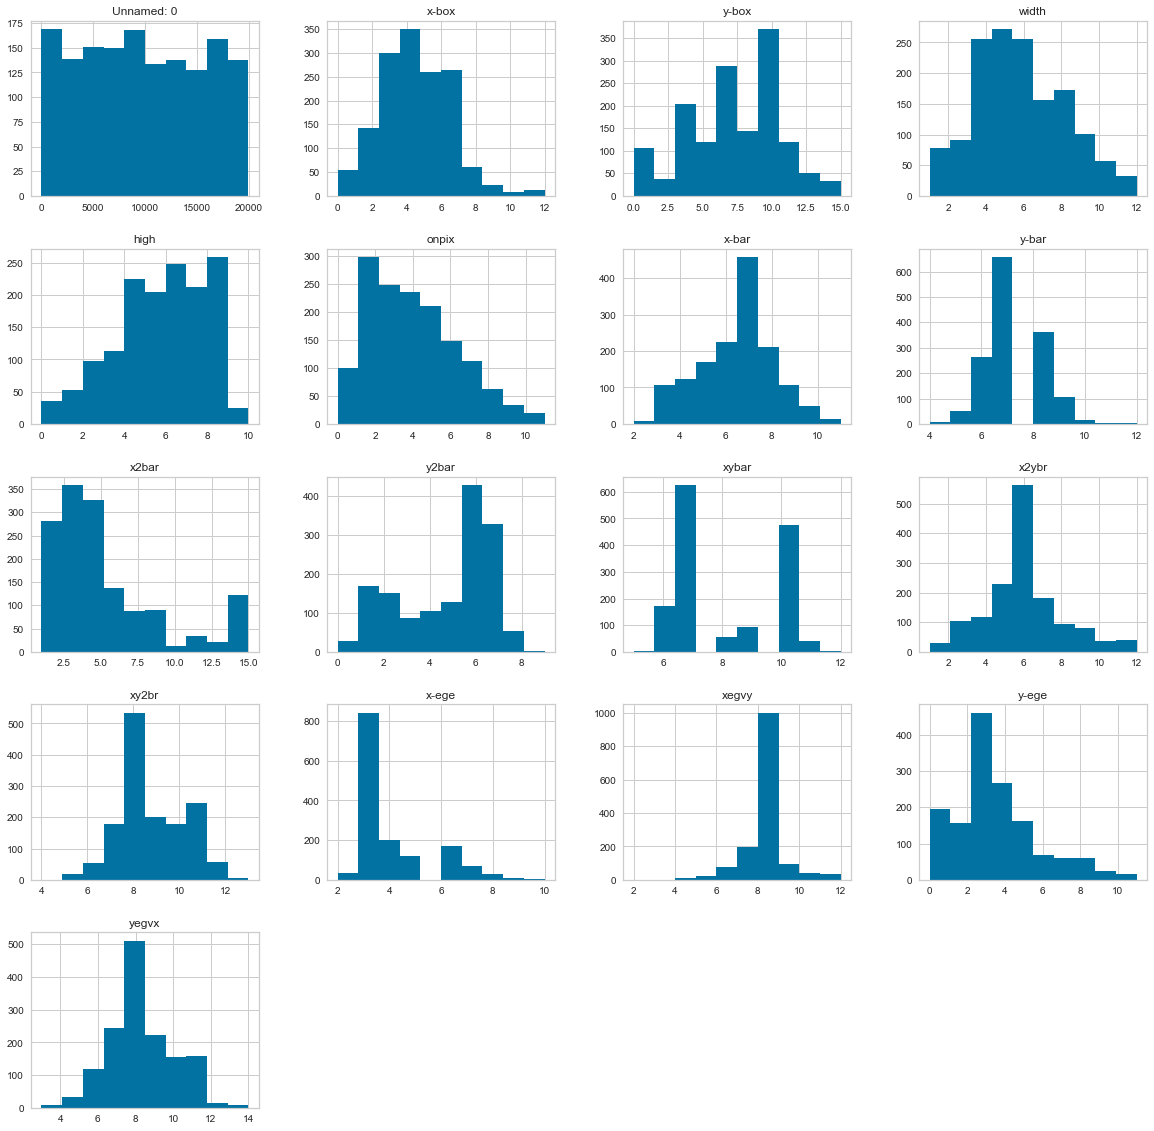

In [68]:
#Return the dimensionality of the DataFrame
print(hkdata.shape)
#Generates descriptive statistics
print(hkdata.describe())
#class distribution
print(hkdata.groupby('class').size())
#histograms
hkdata.hist()
plt.show()

(1578, 17)
             x-box        y-box        width         high        onpix  \
count  1578.000000  1578.000000  1578.000000  1578.000000  1578.000000   
mean      4.539924     6.830798     5.946768     5.505070     4.166667   
std       2.106244     3.268945     2.240676     2.502308     2.813272   
min       0.000000     0.000000     1.000000     0.000000     0.000000   
25%       3.000000     5.000000     4.000000     4.000000     2.000000   
50%       4.000000     7.000000     6.000000     6.000000     4.000000   
75%       6.000000     9.000000     7.000000     7.000000     6.000000   
max      15.000000    15.000000    15.000000    15.000000    15.000000   

             x-bar        y-bar        x2bar        y2bar        xybar  \
count  1578.000000  1578.000000  1578.000000  1578.000000  1578.000000   
mean      7.041191     7.946134     4.326996     3.996831     7.687579   
std       1.997831     2.199674     3.179802     2.114506     1.979440   
min       2.000000     1.0

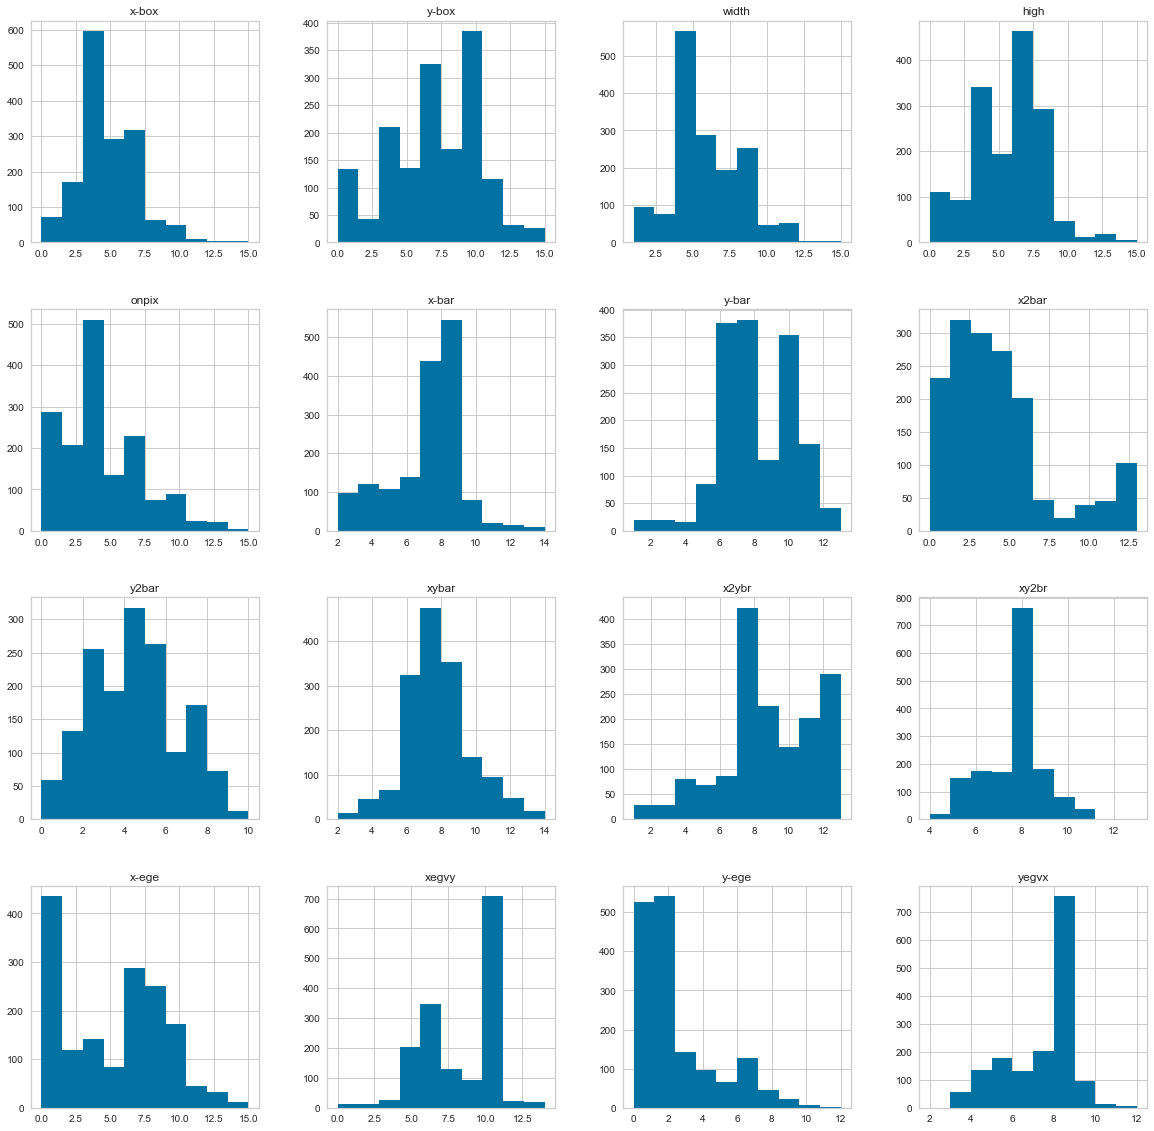

In [69]:
#Return the dimensionality of the DataFrame
print(mydata.shape)
#Generates descriptive statistics
print(mydata.describe())
#class distribution
print(mydata.groupby('class').size())
#histograms
mydata.hist()
plt.show()

(1544, 17)
             x-box        y-box        width         high        onpix  \
count  1544.000000  1544.000000  1544.000000  1544.000000  1544.000000   
mean      5.028497     7.053109     6.564119     5.308290     5.064767   
std       2.138246     3.350515     2.288019     2.180639     2.694600   
min       1.000000     0.000000     1.000000     0.000000     0.000000   
25%       4.000000     5.000000     5.000000     4.000000     3.000000   
50%       5.000000     8.000000     6.000000     6.000000     4.000000   
75%       6.000000    10.000000     8.000000     7.000000     7.000000   
max      15.000000    15.000000    15.000000     9.000000    15.000000   

             x-bar        y-bar        x2bar        y2bar        xybar  \
count  1544.000000  1544.000000  1544.000000  1544.000000  1544.000000   
mean      6.880181     7.774611     4.797927     2.761658     7.525259   
std       2.163270     2.060580     2.910075     1.495790     1.536553   
min       1.000000     1.0

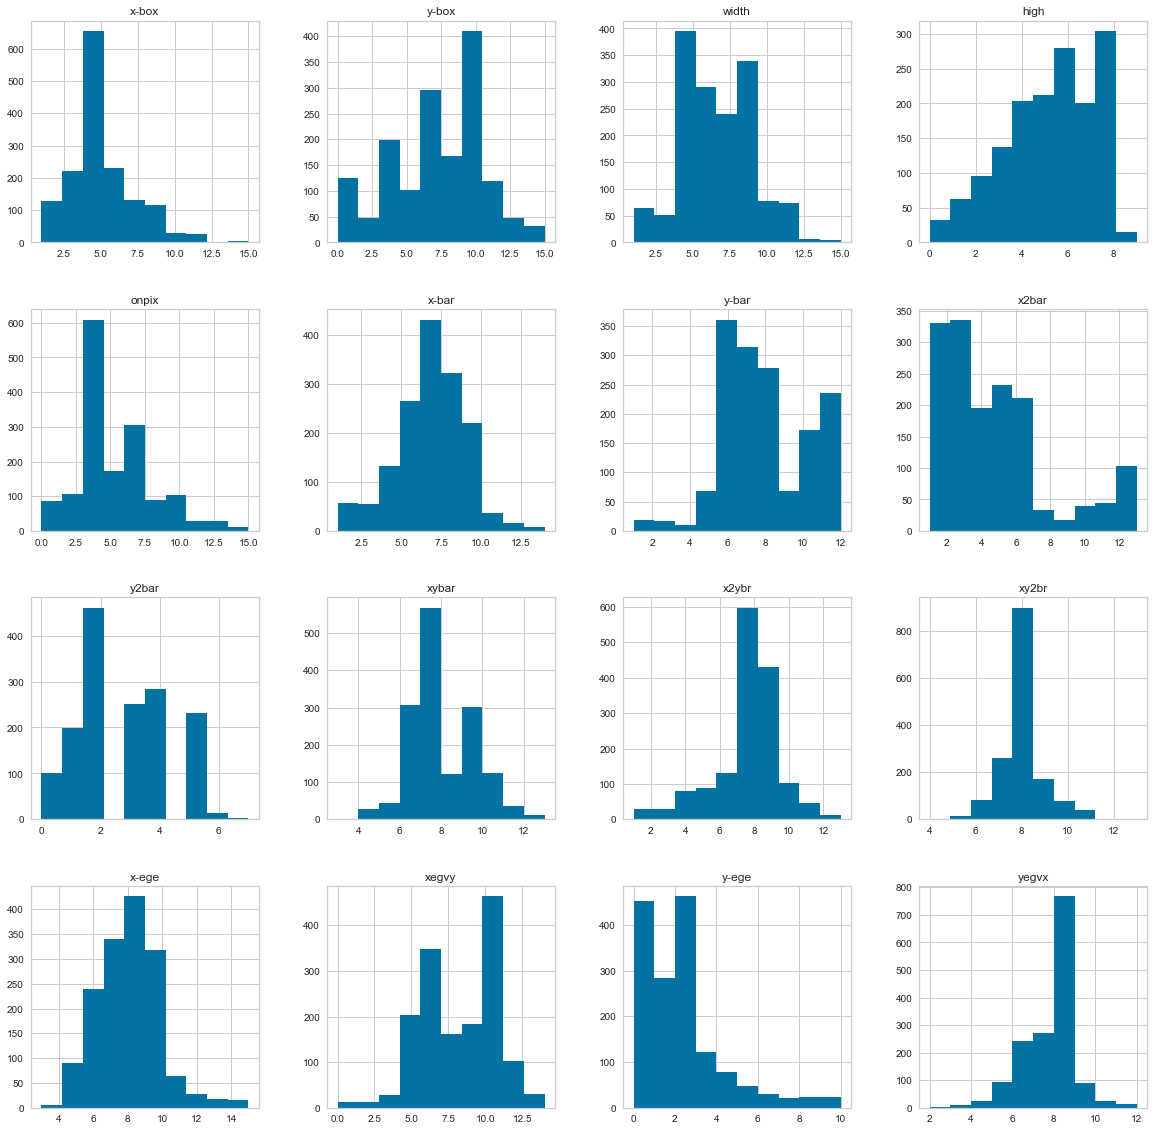

In [70]:
#Return the dimensionality of the DataFrame
print(mwdata.shape)
#Generates descriptive statistics
print(mwdata.describe())
#class distribution
print(mwdata.groupby('class').size())
#histograms
mwdata.hist()
plt.show()

The following cells divides the datasets into their X and Y subsets as well splits them into their training and testing sets, with a 10% validation test size. 

In [104]:
hk_array = hkdata.values
X_hk = hk_array[:, 2:17]
Y_hk = hk_array[:, 1]
print('X_hk matrix dimensionality:', X_hk.shape)
print('Y_hk vector dimensionality:', Y_hk.shape)
my_array = mydata.values
X_my = my_array[:, 1:17]
Y_my = my_array[:, 0]
print('X_my matrix dimensionality:', X_my.shape)
print('Y_my vector dimensionality:', Y_my.shape)
mw_array = mwdata.values
X_mw = mw_array[:, 1:17]
Y_mw = mw_array[:, 0]
print('X_mw matrix dimensionality:', X_mw.shape)
print('Y_mw vector dimensionality:', Y_mw.shape)

X_hk matrix dimensionality: (1473, 15)
Y_hk vector dimensionality: (1473,)
X_my matrix dimensionality: (1578, 16)
Y_my vector dimensionality: (1578,)
X_mw matrix dimensionality: (1544, 16)
Y_mw vector dimensionality: (1544,)


In [105]:
X_hk_train, X_hk_test, Y_hk_train, Y_hk_test = model_selection.train_test_split(X_hk, Y_hk, test_size=0.10, random_state=10)
X_my_train, X_my_test, Y_my_train, Y_my_test = model_selection.train_test_split(X_my, Y_my, test_size=0.10, random_state=10)
X_mw_train, X_mw_test, Y_mw_train, Y_mw_test = model_selection.train_test_split(X_mw, Y_mw, test_size=0.10, random_state=10)

The following cells uses the SVC model and ConfusionMatrix and displays the true positive, false positive, true negative, and false negative statistics of each dataset. 

In [107]:
svc_hk = SVC(kernel='rbf', gamma='auto', C=6)
svc_my = SVC(kernel='rbf', gamma='auto', C=6)
svc_mw = SVC(kernel='rbf', gamma='auto', C=6)

cm_hk = ConfusionMatrix(svc_hk, classes="H,K".split(','))
cm_my = ConfusionMatrix(svc_my, classes="M,Y".split(','))
cm_mw = ConfusionMatrix(svc_mw, classes="M,W".split(','))

0.9864864864864865

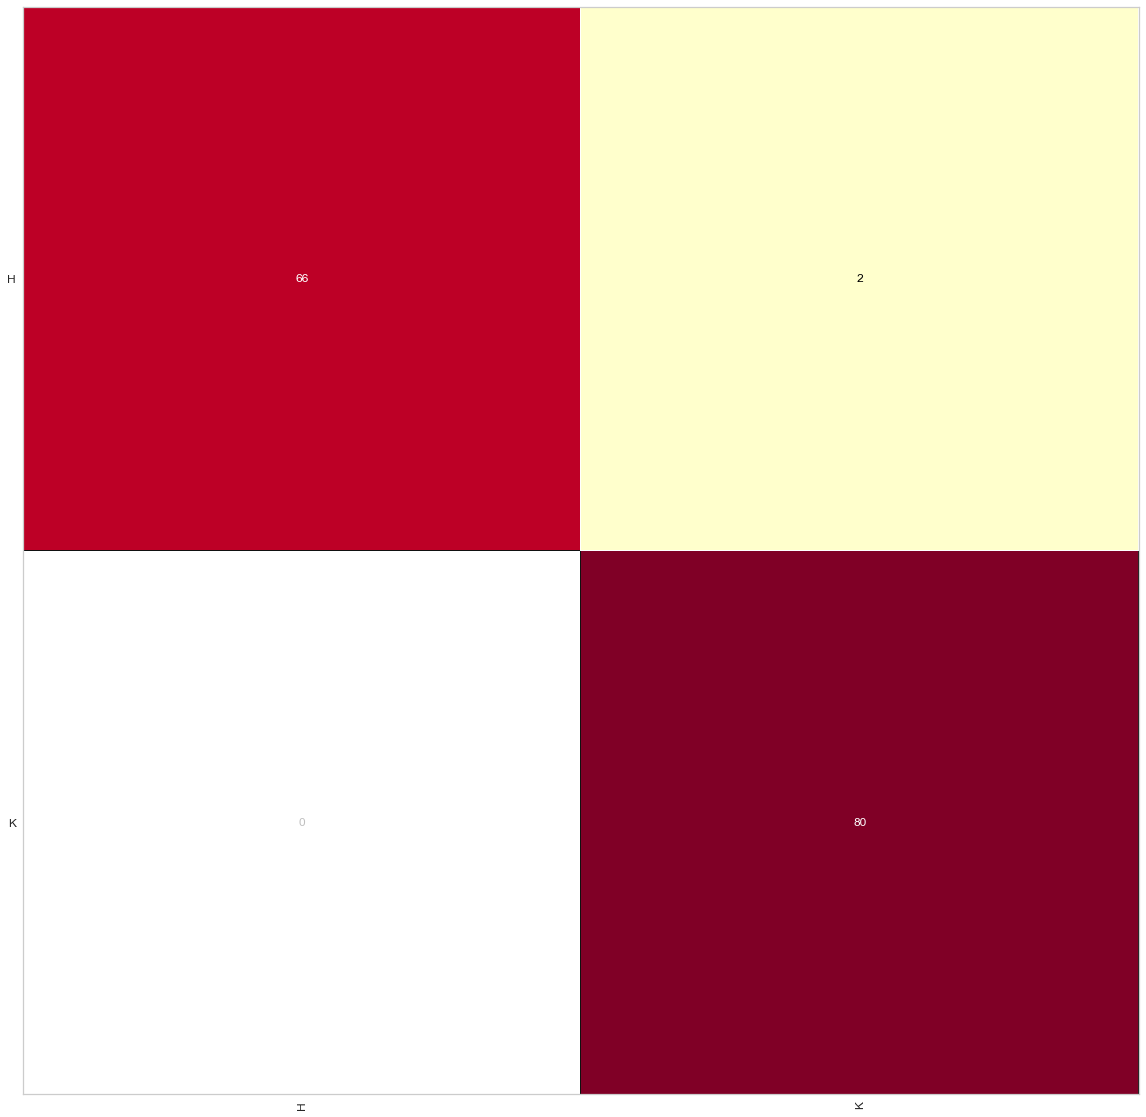

In [108]:
cm_hk.fit(X_hk_train, Y_hk_train)
cm_hk.score(X_hk_test, Y_hk_test)

1.0

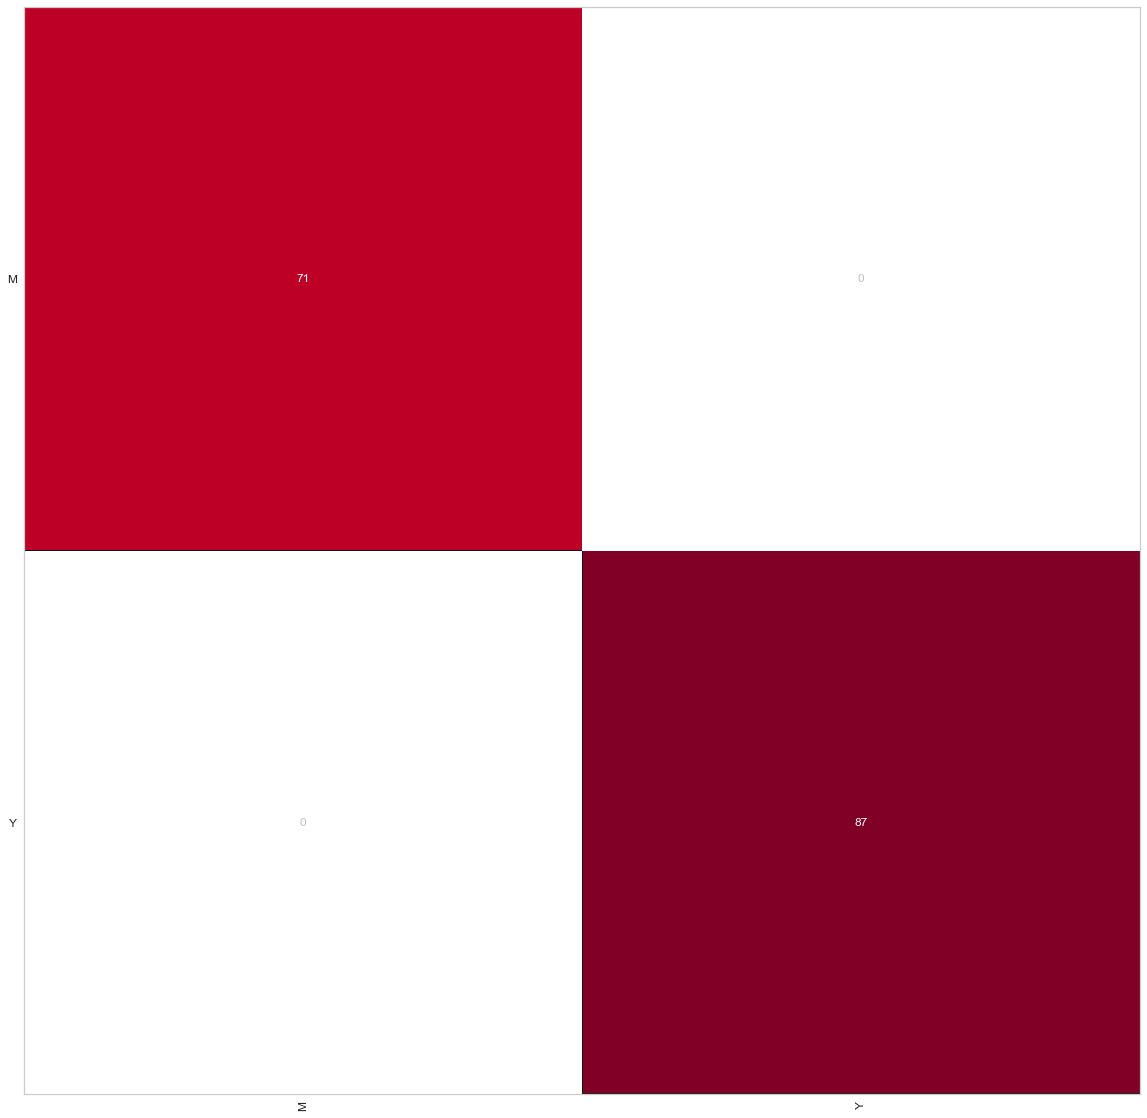

In [109]:
cm_my.fit(X_my_train, Y_my_train)
cm_my.score(X_my_test, Y_my_test)

1.0

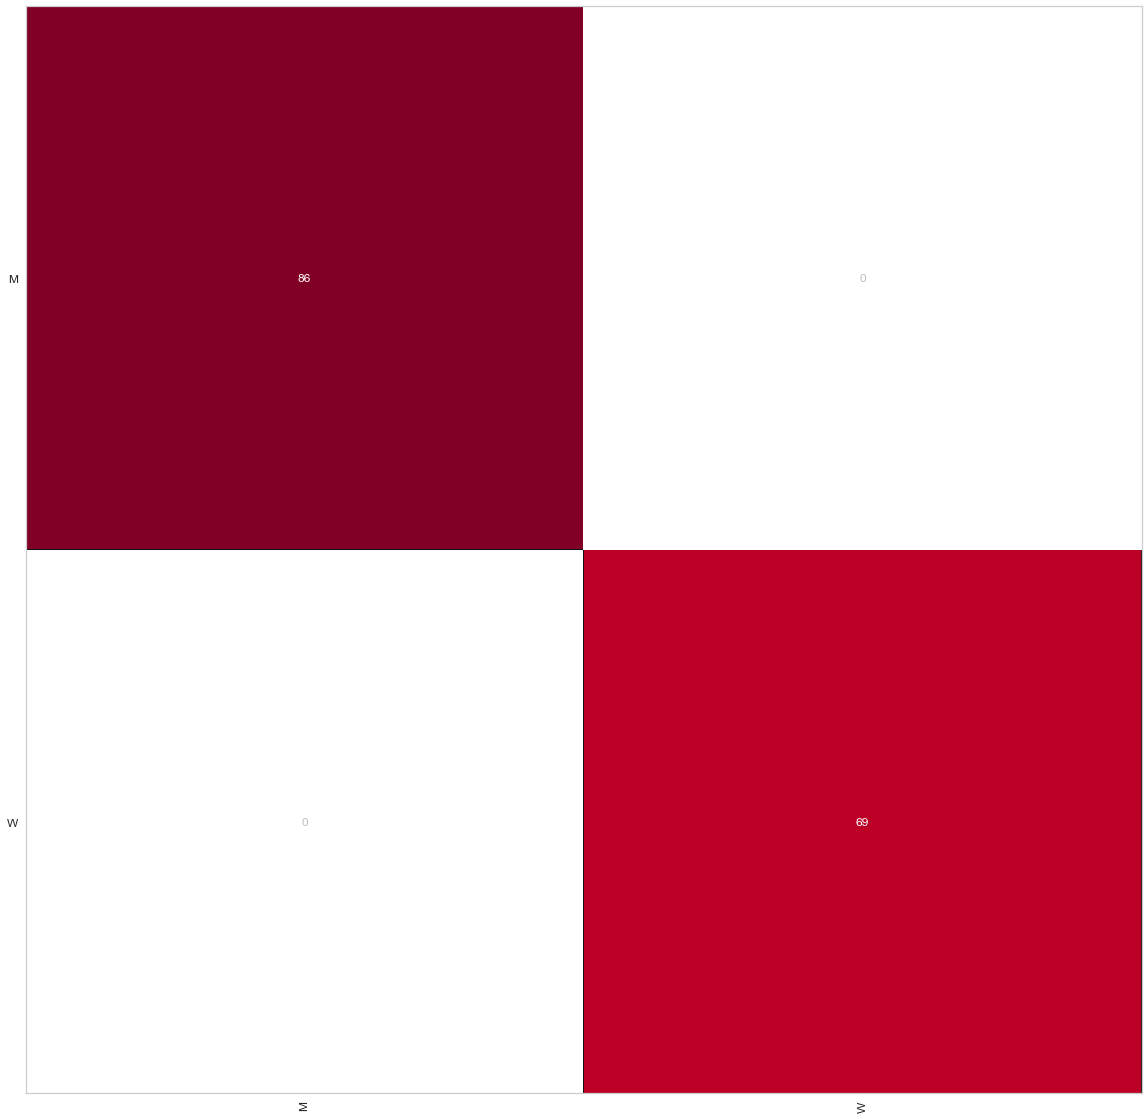

In [110]:
cm_mw.fit(X_mw_train, Y_mw_train)
cm_mw.score(X_mw_test, Y_mw_test)

The following cells predicts and shows the precision, recall, f1-score, and support of each dataset. 

In [111]:
# predict the responses for test dataset
hk_predictions = cm_hk.predict(X_hk_test)
# accuracy classification score
print("Accuracy: ", accuracy_score(Y_hk_test, hk_predictions))
# compute confusion matrix
print(confusion_matrix(Y_hk_test, hk_predictions))
# text report showing the main classification metrics
print(classification_report(Y_hk_test, hk_predictions, digits=5))
cm_hk.poof()

# predict the responses for test dataset
my_predictions = cm_my.predict(X_my_test)
# accuracy classification score
print("Accuracy: ", accuracy_score(Y_my_test, my_predictions))
# compute confusion matrix
print(confusion_matrix(Y_my_test, my_predictions))
# text report showing the main classification metrics
print(classification_report(Y_my_test, my_predictions, digits=5))
cm_my.poof()

# predict the responses for test dataset
mw_predictions = cm_mw.predict(X_mw_test)
# accuracy classification score
print("Accuracy: ", accuracy_score(Y_mw_test, mw_predictions))
# compute confusion matrix
print(confusion_matrix(Y_mw_test, mw_predictions))
# text report showing the main classification metrics
print(classification_report(Y_mw_test, mw_predictions, digits=5))
cm_mw.poof()

Accuracy:  0.9864864864864865
[[66  2]
 [ 0 80]]
              precision    recall  f1-score   support

           H    1.00000   0.97059   0.98507        68
           K    0.97561   1.00000   0.98765        80

    accuracy                        0.98649       148
   macro avg    0.98780   0.98529   0.98636       148
weighted avg    0.98682   0.98649   0.98647       148



<Figure size 1440x1440 with 0 Axes>

Accuracy:  1.0
[[71  0]
 [ 0 87]]
              precision    recall  f1-score   support

           M    1.00000   1.00000   1.00000        71
           Y    1.00000   1.00000   1.00000        87

    accuracy                        1.00000       158
   macro avg    1.00000   1.00000   1.00000       158
weighted avg    1.00000   1.00000   1.00000       158



<Figure size 1440x1440 with 0 Axes>

Accuracy:  1.0
[[86  0]
 [ 0 69]]
              precision    recall  f1-score   support

           M    1.00000   1.00000   1.00000        86
           W    1.00000   1.00000   1.00000        69

    accuracy                        1.00000       155
   macro avg    1.00000   1.00000   1.00000       155
weighted avg    1.00000   1.00000   1.00000       155



<Figure size 1440x1440 with 0 Axes>

<AxesSubplot:title={'center':'SVC Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [26]:
from sklearn.model_selection import GridSearchCV

The following cell is now to tune our hyperparamters to find the best distance method, number of neighbors, and weight type for each datatset

In [112]:
param_grid = {'C': [0.1, 1, 10, 100, 1000], 'gamma': [1, 0.1, 0.01, 0.001, 0.0001],'kernel': ['rbf']} 
hk_grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)
my_grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)
mw_grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)

# fitting the model for grid search
hk_grid.fit(X_hk_train, Y_hk_train)
my_grid.fit(X_my_train, Y_my_train)
mw_grid.fit(X_mw_train, Y_mw_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.506 total time=   0.1s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.502 total time=   0.1s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.502 total time=   0.1s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.502 total time=   0.1s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.502 total time=   0.1s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.917 total time=   0.1s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.917 total time=   0.1s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.921 total time=   0.1s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.940 total time=   0.1s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.894 total time=   0.1s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.947 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

[CV 2/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.758 total time=   0.1s
[CV 3/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.838 total time=   0.1s
[CV 4/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.762 total time=   0.1s
[CV 5/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.785 total time=   0.1s
[CV 1/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.981 total time=   0.1s
[CV 2/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.985 total time=   0.1s
[CV 3/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.962 total time=   0.1s
[CV 4/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.981 total time=   0.1s
[CV 5/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.951 total time=   0.1s
[CV 1/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.977 total time=   0.0s
[CV 2/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.966 total time=   0.0s
[CV 3/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.970 total time=   0.0s
[CV 4/5] END ....C=1000, gam

[CV 4/5] END ........C=100, gamma=1, kernel=rbf;, score=0.824 total time=   0.1s
[CV 5/5] END ........C=100, gamma=1, kernel=rbf;, score=0.803 total time=   0.1s
[CV 1/5] END ......C=100, gamma=0.1, kernel=rbf;, score=0.996 total time=   0.1s
[CV 2/5] END ......C=100, gamma=0.1, kernel=rbf;, score=1.000 total time=   0.1s
[CV 3/5] END ......C=100, gamma=0.1, kernel=rbf;, score=0.996 total time=   0.1s
[CV 4/5] END ......C=100, gamma=0.1, kernel=rbf;, score=1.000 total time=   0.1s
[CV 5/5] END ......C=100, gamma=0.1, kernel=rbf;, score=1.000 total time=   0.1s
[CV 1/5] END .....C=100, gamma=0.01, kernel=rbf;, score=1.000 total time=   0.0s
[CV 2/5] END .....C=100, gamma=0.01, kernel=rbf;, score=1.000 total time=   0.0s
[CV 3/5] END .....C=100, gamma=0.01, kernel=rbf;, score=1.000 total time=   0.0s
[CV 4/5] END .....C=100, gamma=0.01, kernel=rbf;, score=1.000 total time=   0.0s
[CV 5/5] END .....C=100, gamma=0.01, kernel=rbf;, score=1.000 total time=   0.0s
[CV 1/5] END ....C=100, gamm

[CV 1/5] END .......C=10, gamma=0.1, kernel=rbf;, score=0.993 total time=   0.1s
[CV 2/5] END .......C=10, gamma=0.1, kernel=rbf;, score=1.000 total time=   0.1s
[CV 3/5] END .......C=10, gamma=0.1, kernel=rbf;, score=1.000 total time=   0.1s
[CV 4/5] END .......C=10, gamma=0.1, kernel=rbf;, score=0.989 total time=   0.1s
[CV 5/5] END .......C=10, gamma=0.1, kernel=rbf;, score=0.989 total time=   0.1s
[CV 1/5] END ......C=10, gamma=0.01, kernel=rbf;, score=1.000 total time=   0.0s
[CV 2/5] END ......C=10, gamma=0.01, kernel=rbf;, score=0.996 total time=   0.0s
[CV 3/5] END ......C=10, gamma=0.01, kernel=rbf;, score=0.996 total time=   0.0s
[CV 4/5] END ......C=10, gamma=0.01, kernel=rbf;, score=0.989 total time=   0.0s
[CV 5/5] END ......C=10, gamma=0.01, kernel=rbf;, score=1.000 total time=   0.0s
[CV 1/5] END .....C=10, gamma=0.001, kernel=rbf;, score=0.964 total time=   0.0s
[CV 2/5] END .....C=10, gamma=0.001, kernel=rbf;, score=0.968 total time=   0.0s
[CV 3/5] END .....C=10, gamm

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [113]:
# print best parameter after tuning
print(hk_grid.best_params_)
# print how our model looks after hyper-parameter tuning
print(hk_grid.best_estimator_)

# print best parameter after tuning
print(my_grid.best_params_)
# print how our model looks after hyper-parameter tuning
print(my_grid.best_estimator_)

# print best parameter after tuning
print(mw_grid.best_params_)
# print how our model looks after hyper-parameter tuning
print(mw_grid.best_estimator_)

{'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}
SVC(C=10, gamma=0.01)
{'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}
SVC(C=10, gamma=0.01)
{'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}
SVC(C=10, gamma=0.01)


In [116]:
hk_grid_predictions = hk_grid.predict(X_hk_test)
print("H and K: ",classification_report(Y_hk_test, hk_grid_predictions))
my_grid_predictions = my_grid.predict(X_my_test)
print("M and Y: ", classification_report(Y_my_test, my_grid_predictions))
mw_grid_predictions = mw_grid.predict(X_mw_test)
print("M and W: ", classification_report(Y_mw_test, mw_grid_predictions))

H and K:                precision    recall  f1-score   support

           H       0.97      1.00      0.99        68
           K       1.00      0.97      0.99        80

    accuracy                           0.99       148
   macro avg       0.99      0.99      0.99       148
weighted avg       0.99      0.99      0.99       148

M and Y:                precision    recall  f1-score   support

           M       1.00      1.00      1.00        71
           Y       1.00      1.00      1.00        87

    accuracy                           1.00       158
   macro avg       1.00      1.00      1.00       158
weighted avg       1.00      1.00      1.00       158

M and W:                precision    recall  f1-score   support

           M       1.00      1.00      1.00        86
           W       1.00      1.00      1.00        69

    accuracy                           1.00       155
   macro avg       1.00      1.00      1.00       155
weighted avg       1.00      1.00      1.00 

In [166]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics

The following cells encodes the string letters into integers to use when displaying the ROC curve

In [168]:
le=LabelEncoder()
Y_hk_test[:]=le.fit_transform(Y_hk_test[:])
Y_hk_test = Y_hk_test.astype(int)
hk_grid_predictions[:]=le.fit_transform(hk_grid_predictions[:])

Y_my_test[:]=le.fit_transform(Y_my_test[:])
Y_my_test = Y_my_test.astype(int)
my_grid_predictions[:]=le.fit_transform(my_grid_predictions[:])

Y_mw_test[:]=le.fit_transform(Y_mw_test[:])
Y_mw_test = Y_mw_test.astype(int)
mw_grid_predictions[:]=le.fit_transform(mw_grid_predictions[:])

In [169]:
hk_fpr, hk_tpr, hk_thresholds = roc_curve(Y_hk_test, hk_grid_predictions, pos_label=None)
my_fpr, my_tpr, my_thresholds = roc_curve(Y_my_test, my_grid_predictions, pos_label=None)
mw_fpr, mw_tpr, mw_thresholds = roc_curve(Y_mw_test, mw_grid_predictions, pos_label=None)

The following cells displays the ROC curves for each dataset after hyperparameter tuning.

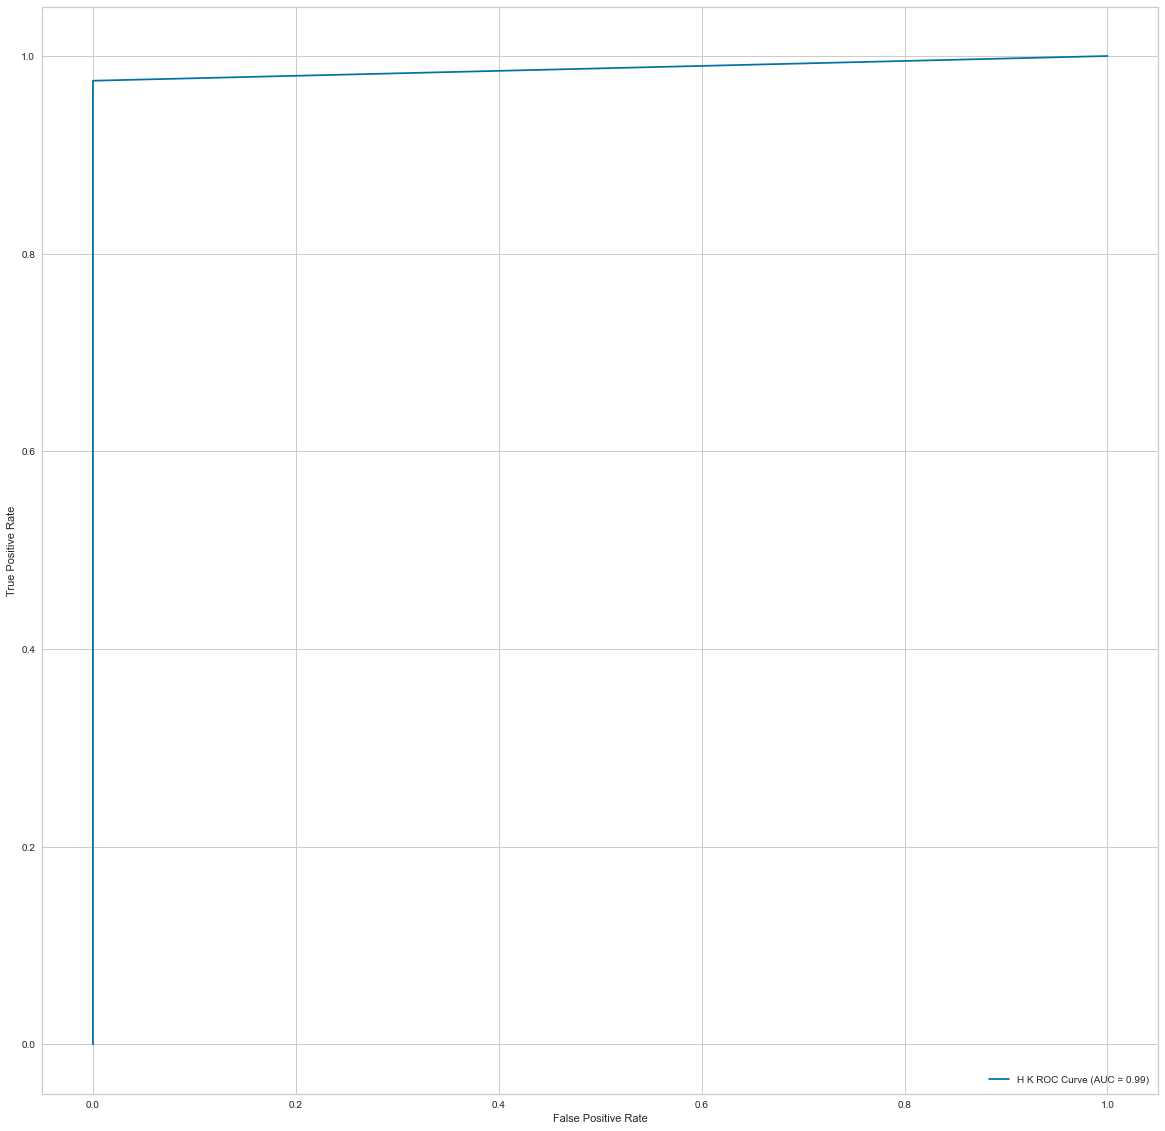

In [170]:
hk_roc_auc = metrics.auc(hk_fpr, hk_tpr)
hk_display = metrics.RocCurveDisplay(fpr=hk_fpr, tpr=hk_tpr, roc_auc=hk_roc_auc,
                                   estimator_name='H K ROC Curve')
hk_display.plot()
plt.show()

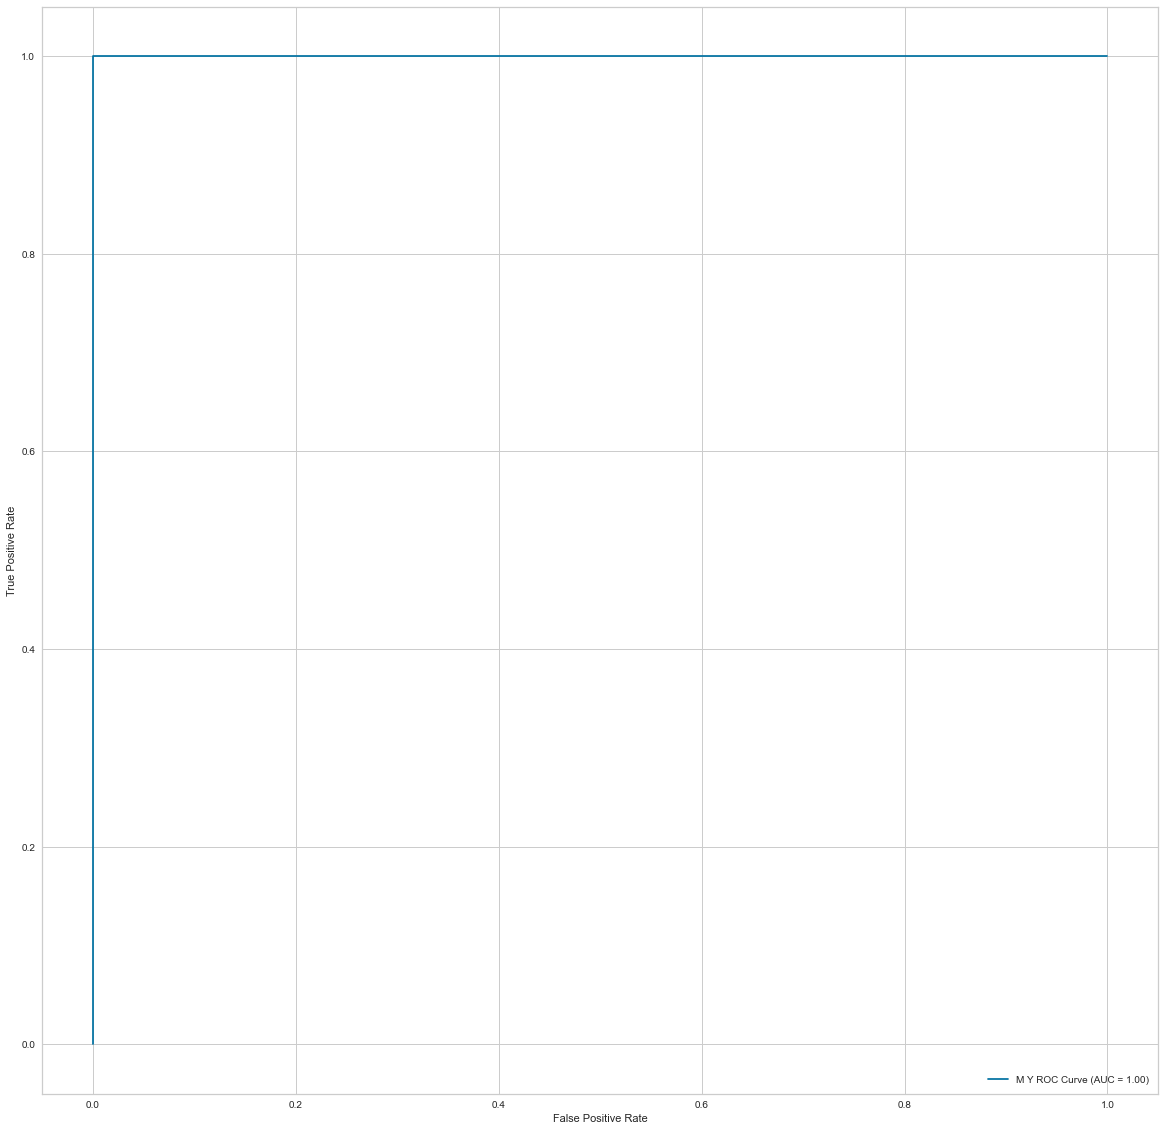

In [171]:
my_roc_auc = metrics.auc(my_fpr, my_tpr)
my_display = metrics.RocCurveDisplay(fpr=my_fpr, tpr=my_tpr, roc_auc=my_roc_auc,
                                   estimator_name='M Y ROC Curve')
my_display.plot()
plt.show()

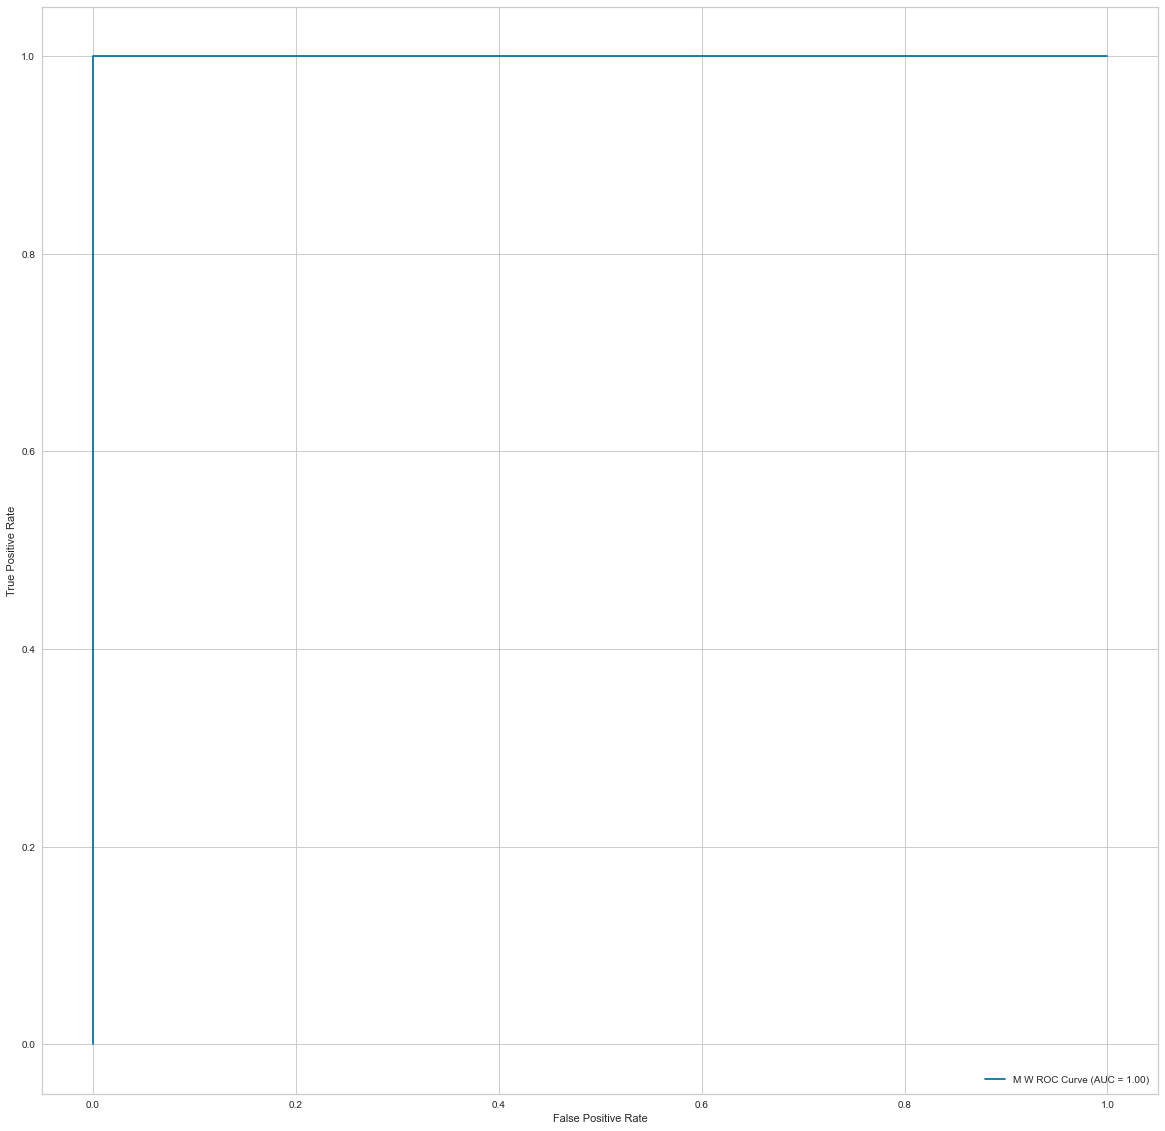

In [172]:
mw_roc_auc = metrics.auc(mw_fpr, mw_tpr)
mw_display = metrics.RocCurveDisplay(fpr=mw_fpr, tpr=mw_tpr, roc_auc=mw_roc_auc,
                                   estimator_name='M W ROC Curve')
mw_display.plot()
plt.show()